In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile

In this Demo I used Nhances data to predict the diabetic people and people at risk of diabetes through logistic regression classifier. 

I chose some of the well-known important features which are correlated with the health.These features includes: Age, Gender, Race, Weight, Height, BMI, waist circumference as a body anthropometry measure,and body fat compositions(which can be predicted from 3D body anthropometry measurements with 0.9> accuracy). 


In [49]:
address='/Users/Ali/Desktop/Data_Sima/NHANES-6-21-17.xlsx'
df=pd.read_excel(address, sheet_name='adults')
feature_set_1=['RIAGENDR','RIDAGEYR','RACETH','bmxwt','bmxht','bmxbmi','bmxwaist','lbxglu','BMXTRI','DXXHEBMC','DXXHEFAT','DXXTRFAT','DXDTOFAT']

Two classes are defined:
class 1:Healthy people  (lbxglu <100)
class 2:Diabetic people and people at risk of diabetes (lbxglu >100)

In [50]:
df_diab=df[feature_set_1];
df_diab['diabetic']= df_diab['lbxglu'].apply(lambda x: 1 if (x>100)  else 0)
df_diab.dropna(inplace=True)
df_diab.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(7772, 14)

Here I am running some initial visualization to learn about the data distribution.
For instance ploting histogram of "total body fat" for two genders, shows that as the total fat increases ratio of diabetic people (class 1) to health people (class 0) increases. Also it shows that there are more diabetic among females(gender=1)compared to males (gender=2).
Initial analysis like this give me more insight for feature selection, findings the outliers and model selection.

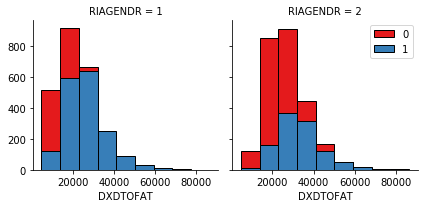

In [20]:
bins = np.linspace(df_diab.DXDTOFAT.min(), df_diab.DXDTOFAT.max(), 10)
g = sns.FacetGrid(df_diab, col="RIAGENDR", hue="diabetic", palette="Set1", col_wrap=2)
g.map(plt.hist, 'DXDTOFAT', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Grouping the people based on their gender demostrate that risk of diabetes is higher in females than males. 41% in females versus 29% in males

In [21]:
df_diab.groupby(['RIAGENDR'])['diabetic'].value_counts(normalize=True)

RIAGENDR  diabetic
1         0           0.580886
          1           0.419114
2         0           0.709232
          1           0.290768
Name: diabetic, dtype: float64

In [36]:

from sklearn.model_selection import train_test_split

feature_set_2=['RIAGENDR','RIDAGEYR','RACETH','bmxwt','bmxht','bmxbmi','bmxwaist','BMXTRI','DXXHEBMC','DXXHEFAT','DXXTRFAT','DXDTOFAT']

X=df_diab[feature_set_2]
y=df_diab['diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6217, 12) (6217,)
Test set: (1555, 12) (1555,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
LR_model = LogisticRegression(C=0.01,class_weight='balanced').fit(X_train,y_train)

yhat = LR_model.predict(X_test)

print (classification_report(y_test,yhat ))
print(confusion_matrix(y_test, yhat, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75       995
           1       0.57      0.76      0.65       560

    accuracy                           0.71      1555
   macro avg       0.70      0.72      0.70      1555
weighted avg       0.74      0.71      0.72      1555

[[677 318]
 [133 427]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
